In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Itô Process

From the end of last chapter, we have seen the most the basic form of Brownian motion.
$$
d S=\mu S d t+\sigma S d X
$$
A similar process called "Itô process" can be similarly defined
$$
dx = a(x, t) dt + \sigma (x, t) dX
$$
There both drift and diffusion are time-dependent. To discretize the process
$$
\Delta x=a(x, t) \Delta t+\sigma(x, t) \epsilon \sqrt{\Delta t}
$$

And define and other differentiable function $G(x, t)$, the Taylor expansion will
$$
\Delta G=\frac{\partial G}{\partial x} \Delta x+\frac{\partial G}{\partial t} \Delta t+\frac{1}{2} \frac{\partial^2 G}{\partial x^2} \Delta x^2+\frac{\partial^2 G}{\partial x \partial t} \Delta x \Delta t+\frac{1}{2} \frac{\partial^2 G}{\partial t^2} \Delta t^2+\cdots
$$



#  Itô's Lemma


This will one of most import section in the whole stochastic calculus, so pay attention. To understand how we achieve a Lemma with Taylor expansion of $\Delta G$, we have to reiterate some properties of Wiener process. 

For a Wiener process $d X$, the increments $d X$ over small time intervals $d t$ have some special properties:
- $\mathbb{E}[d X]=0$
- $\mathbb{E}\left[(d X)^2\right]=d t$

These properties arise because $d X \sim \mathcal{N}(0, d t)$.


The Taylor expansion's higher order can be dropped because $\Delta t \rightarrow 0$. 

However, the $(\Delta x)^2$ term is of interest because it involves $(d X)^2$, which converges to $d t$ due to the properties of Brownian motion $\left((d X)^2=d t\right)$ as we just shown. And this term can't be dropped because of that.

Substituting $\Delta x$ and simplifying, we ignore terms of order higher than $dt$: $$ \Delta G = \frac{\partial G}{\partial x} (a(x, t) dt + \sigma(x, t) dX) + \frac{\partial G}{\partial t} dt + \frac{1}{2} \frac{\partial^2 G}{\partial x^2} \sigma^2(x, t) (dX)^2 $$

Since $(dX)^2 = dt$, we can rewrite the equation as: $$ dG = \left( \frac{\partial G}{\partial x} a(x, t) + \frac{\partial G}{\partial t} + \frac{1}{2} \frac{\partial^2 G}{\partial x^2} \sigma^2(x, t) \right) dt + \frac{\partial G}{\partial x} \sigma(x, t) dX $$

And this completes the derivation of Itô's Lemmma.

# Infnitesimal Generator


The infinitesimal generator $\mathcal{L}$ of a stochastic process is an operator that acts on a function $G(x, t)$ to produce another function that describes the expected rate of change of $G$ due to the stochastic process alone, ignoring any explicit time dependence.

Given Itô's Lemma, the infinitesimal generator $\mathcal{L}$ can be derived by focusing on the drift and diffusion components that affect the change in $G(x, t)$, excluding the direct time derivative term. 

$$
G(x+\Delta x, t+\Delta t) \approx G(x, t)+\Delta G .
$$


Taking the expectation on Ito's lemma:
Note that $\mathbb{E}[\epsilon]=0$ and $\mathbb{E}\left[\epsilon^2\right]=1$.
Thus, the expectation of $\Delta G$ :
$$
\begin{align}
\mathbb{E}[\Delta G]&=\mathbb{E}\left[\frac{\partial G}{\partial x} a(x, t) \Delta t+\underbrace{\frac{\partial G}{\partial x} \sigma(x, t) \epsilon \sqrt{\Delta t}}_{E(\cdot)=0}+\frac{\partial G}{\partial t} \Delta t+\frac{1}{2} \frac{\partial^2 G}{\partial x^2} \sigma^2(x, t) \Delta t\right] \\
\mathbb{E}[\Delta G]&=\frac{\partial G}{\partial x} a(x, t) \Delta t+\frac{\partial G}{\partial t} \Delta t+\frac{1}{2} \frac{\partial^2 G}{\partial x^2} \sigma^2(x, t) \Delta t
\end{align}
$$

The infinitesimal generator $\mathcal{L}$ applied to $G(x, t)$ is thus obtained by taking the expectation of the stochastic part of $dG$ and is given by:
$$
\mathcal{L}G = \lim_{\Delta t \to 0} \frac{\mathbb{E}[G(x + \Delta x, t + \Delta t) - G(x, t)]}{\Delta t} =\lim _{\Delta t \rightarrow 0} \frac{\mathbb{E}[\Delta G]}{\Delta t}
$$

Arrange a bit:
$$
\mathcal{L}G = \frac{\partial G}{\partial x} a(x, t) + \frac{1}{2} \frac{\partial^2 G}{\partial x^2} \sigma^2(x, t)
$$


# Chapman-Kolmogorov Equation

Definition
For a Markov process $X_t$, the Chapman-Kolmogorov equation states that the probability of transitioning from state $x_0$ at time $t_0$ to state $x$ at time $t+\Delta t$ can be obtained by integrating over all intermediate states $x'$ at an intermediate time $t$ :
$$
p\left(x, t+\Delta t \mid x_0, t_0\right)=\int_{-\infty}^{\infty} p(x, t+\Delta t \mid x', t) p\left(x', t \mid x_0, t_0\right) d x'
$$

Deriviation is not important, we will use the result soon.

# Transition Density Function

$$
p(x,t | x', t') = \frac{1}{\sqrt{2 \pi t}} \exp\left(-\frac{x^2}{2t}\right)
$$

Backward and forward equations.

Brownian motion must satisfy that $\delta y$ and $\delta t ^2$ be the same order.

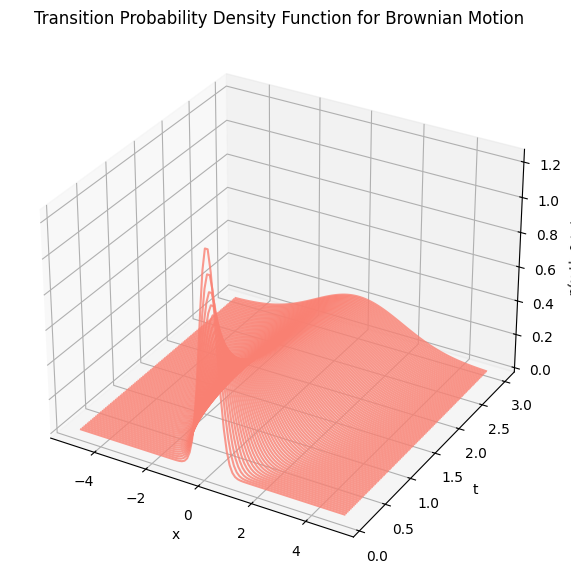

In [2]:


# Define the parameters
x0 = 0
t_values = np.array(np.linspace(0.1, 3, 100))  # Different time points
x = np.linspace(-5, 5, 100)  # Range of x values

# Initialize the 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Calculate and plot the transition PDFs for different t values
for t in t_values:
    p_xt = (1 / np.sqrt(2 * np.pi * t)) * np.exp(-x**2 / (2 * t))
    ax.plot(x, [t]*len(x), p_xt, color='salmon', alpha=0.8)

# Labeling the axes
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('p(x,t|x0,t0)')

# Set the title
ax.set_title('Transition Probability Density Function for Brownian Motion')

# Display the plot
plt.show()


# Fokker-Planck Equation

This is the last step in this quest.

Apply the infinitesimal generator to the transition probability density $p\left(x, t \mid y, t_0\right)$ :
$$
\frac{\partial p\left(x, t \mid x_0, t_0\right)}{\partial t}=\mathcal{L} p\left(x, t \mid x_0, t_0\right)=-\frac{\partial}{\partial x}\left[a(x, t) p\left(x, t \mid x_0, t_0\right)\right]+\frac{1}{2} \frac{\partial^2}{\partial x^2}\left[\sigma^2(x, t) p\left(x, t \mid x_0, t_0\right)\right]
$$


Substitute this back into the differential form of the Chapman-Kolmogorov equation:
$$
\begin{aligned}
 \frac{\partial p\left(x, t \mid x_0, t_0\right)}{\partial t}=
 \int_{-\infty}^{\infty}\left(-\frac{\partial}{\partial x}\left[a(x, t) p\left(x, t \mid x_0, t_0\right)\right]+\frac{1}{2} \frac{\partial^2}{\partial x^2}\left[\sigma^2(x, t) p\left(x, t \mid x_0, t_0\right)\right]\right) p\left(x_0, t \mid x_0, t_0\right) d x_0 \\
\end{aligned}
$$

Assuming that $p\left(y, t \mid x_0, t_0\right)$ is sufficiently smooth, we can take the differential operators outside of the integral:
$$
\frac{\partial p\left(x, t \mid x_0, t_0\right)}{\partial t}=-\frac{\partial}{\partial x}[a(x, t) p(x, t)]+\frac{1}{2} \frac{\partial^2}{\partial x^2}\left[\sigma^2(x, t) p(x, t)\right]
$$
Here completes the derivation of Fokker-Planck Equation.

# Brownian Motion in Fokker-Planck Equation

For Brownian motion, drift is $0$, i.e. $a(x, t) = 0$, diffusion is $\sigma^2$. 
$$
\frac{\partial p(x, t)}{\partial t}=\frac{1}{2} \frac{\partial^2}{\partial x^2}\left[\sigma^2 p(x, t)\right]
$$


Since $\sigma$ is constant, we can take it outside the derivative:
$$
\frac{\partial p(x, t)}{\partial t}=\frac{\sigma^2}{2} \frac{\partial^2 p(x, t)}{\partial x^2}
$$

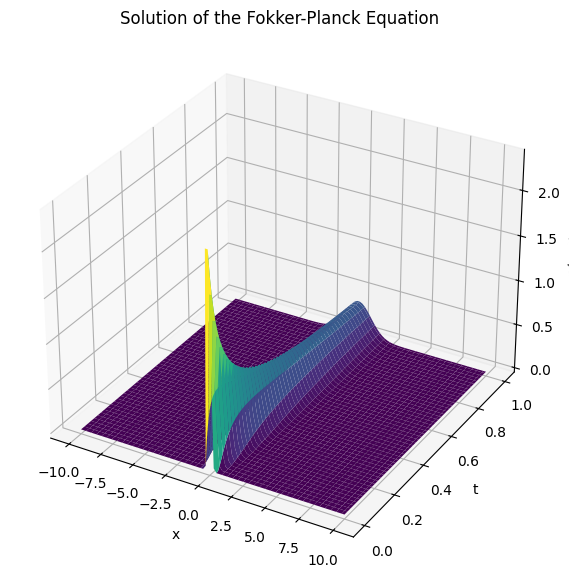

In [5]:

# Parameters
sigma = 1.0
D = sigma**2 / 2
L = 10  # domain length
Nx = 100  # number of spatial points
Nt = 100  # number of time points
x = np.linspace(-L, L, Nx)
t = np.linspace(0, 1, Nt)  # simulate up to t = 1
dx = x[1] - x[0]
dt = t[1] - t[0]

# Initialize the probability density function
p = np.zeros((Nx, Nt))
p[:, 0] = np.exp(-x**2 / (2 * (dx/2)**2)) / np.sqrt(2 * np.pi * (dx/2)**2)  # initial Gaussian

# Time-stepping loop to solve the PDE
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        p[i, n+1] = p[i, n] + D * dt / dx**2 * (p[i+1, n] - 2 * p[i, n] + p[i-1, n])
    # Boundary conditions: p(x, t) -> 0 as |x| -> infinity
    p[0, n+1] = p[1, n+1]
    p[-1, n+1] = p[-2, n+1]

# Create the 3D plot
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, p.T, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('p(x, t)')
ax.set_title('Solution of the Fokker-Planck Equation')

plt.show()
